CIFAR 加拿大高等研究院(Canadian Institute For Advanced Research)

Cifar-10 是由 Hinton 的两个大弟子 Alex Krizhevsky、Ilya Sutskever 收集的一个用于普适物体识别的数据集。Cifar 是加拿大政府牵头投资的一个先进科学项目研究所。Hinton、Bengio和他的学生在2004年拿到了 Cifar 投资的少量资金，建立了神经计算和自适应感知项目。

Visual Dictionary
http://groups.csail.mit.edu/vision/TinyImages/

总共有6万个数据，其中五万是训练数据，一万是测试数据

总共有10中类型图片分别是：'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'

需要使用pickle进行原始数据的读取

我们当前包下有个Jupyter文件：loadimage.ipynp，这个文件演示了如何从data_batch_x中读取数据

我们要做机器学习，使用五万数据训练我们的机器学习模型，然后使用机器学习模型测试我们的测试数据

导包  
pickle  
icon_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

加载训练数据

使用pickle.load(),encoding = 'ISO-8859-1'  


显示其中部分数据

加载预测数据

使用np.concatenate()方法级联所有训练数据

使用支持向量机作为机器学习模型

In [2]:
import pickle

In [1]:
icon_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
with open('./data/kinds-of-pictures/data_batch_1','rb') as file:
    demo = pickle.load(file,encoding = 'ISO-8859-1')

In [20]:
target = demo['labels']  # 目标值 这些编号 和 icon_name中的内容是对应的
data = demo['data']  # 特征值

In [18]:
target

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [8]:
demo['data'].shape  # 10000行3072列 10000个样本（图片） 每个图片特征是3072

(10000, 3072)

In [ ]:
# 图片的形状 32*32 3

In [ ]:
demo['data'][0].reshape(32,32,3)

In [10]:
import matplotlib.pyplot as plt

In [ ]:
# 这里图片的形状是
# 1行1列[r,b,b] 1,2[rgb]  r g b r g b
# 1,1,r 1,2,r
# r r r .... g g g.... b b b....

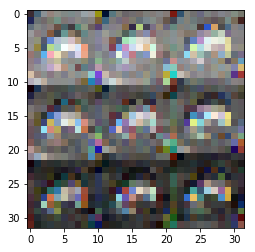

In [11]:
plt.imshow(demo['data'][0].reshape(32,32,3))  # 注意 这些图片的 值的顺序 和我们之前的顺序不一样

In [ ]:
demo['data'][0][:1024]  # 所有的r

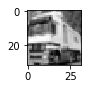

In [16]:
plt.figure(figsize=(1,1))
plt.imshow(demo['data'][1][:1024].reshape(32,32),cmap='gray')

In [ ]:
# 10000个图片 前面5000个作训练 最后2000个打分 并且 把其中100个给大家展示一下

In [21]:
X_train = data[:5000]
y_train = target[:5000]
X_test = data[-2000:]
y_test = target[-2000:]

使用PCA进行降维  from sklearn.decomposition import PCA

进行训练

获取测试数据

In [22]:
from sklearn.svm import SVC

In [23]:
svc = SVC()

In [ ]:
svc.fit(X_train,y_train)  # 这个时间特别长

In [24]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=0.9,whiten=True)

In [27]:
pca.fit(X_train,y_train)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [ ]:
# pca训练的时间确实比较长
# 但是训练好之后 用模型去transform时间比较短
# 并且 使用 transform 之后 的 pca_data 去训练svc模型 时间提高了很多

In [28]:
pca_X_train = pca.transform(X_train)

In [29]:
pca_X_test = pca.transform(X_test)

In [30]:
pca_X_train.shape

(5000, 95)

In [31]:
# 使用的是pca处理之后的数据 去训练svc 时间大大缩短
svc.fit(pca_X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
svc.score(pca_X_test,y_test)

0.4415

In [34]:
# 画图展示一下
y_ = svc.predict(pca_X_test[:100])  # 预测的结果

In [39]:
y_[0]

3

In [36]:
X_test[0][:1024].shape

(3072,)

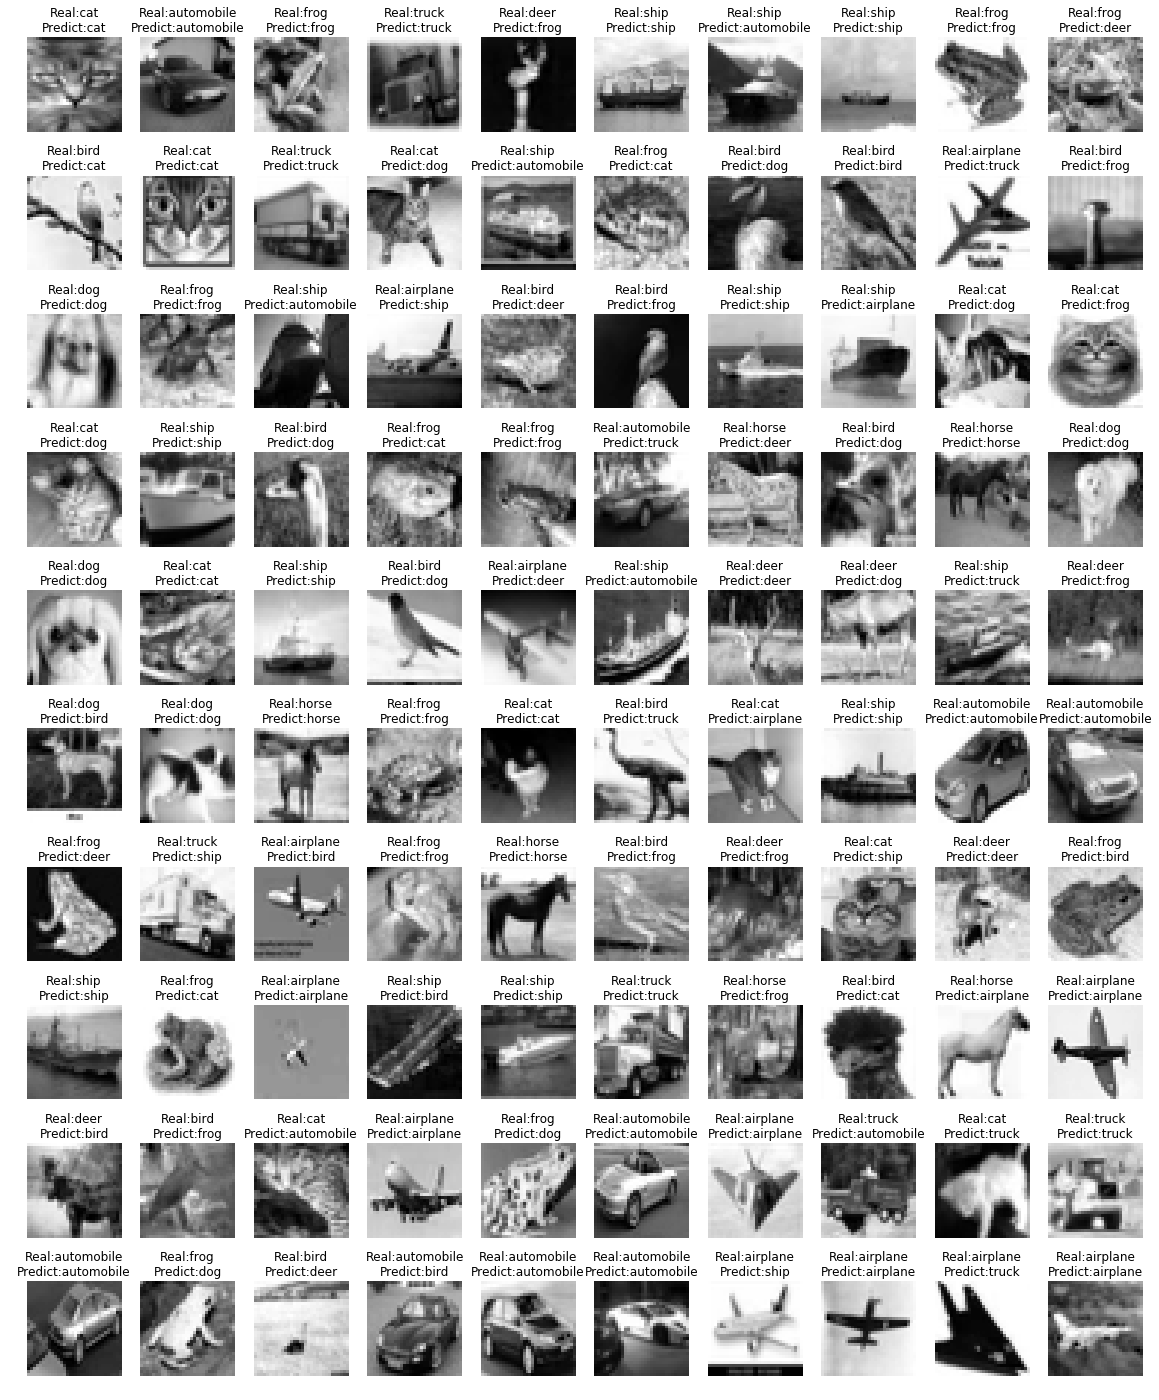

In [42]:
plt.figure(figsize=(20,25))
for i in range(100):
    axes = plt.subplot(10,10,i+1)
    # 从X_test中 按照索引i 一个一个地取数据 （一个一个的图片数据）
    plt.imshow(X_test[i][:1024].reshape(32,32),cmap='gray')
    axes.axis('off')
    # 把预测的结果 作为图片的 名字 让大家看预测结果
    # y_[i] 获取的是每个图片所属的分类的编号
    # 还需要按照编号 去icon_name里面 查找真正的名字
    predict = icon_name[y_[i]]
    real = icon_name[y_test[i]]
    axes.set_title('Real:'+ real + '\nPredict:' + predict)  # 把预测的的分类的名字作为标题
    

取前100个数据作为预测数据

展示测试结果